<a href="https://colab.research.google.com/github/sonovman/GNN-from-scratch/blob/main/Part2_HandlingData_KarateClub_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Think Graph Neural Networks (GNN) are hard to understand?**

**Think Graph Neural Networks (GNN) are hard to understand?**

**Part 2** (https://youtu.be/VDzrvhgyxsU):
-----------------------------
- Graph representations 
- Adjacency Matrix
- Feature Matrix
- Incidence Matrix
- Degree Matrix
- Laplacian Matrix 
- Bag of Nodes
- Node Embedding and Node Embedding Space
- Applying Convolution to Graph similar to Image
- Message Passing
- Understanding Graph Datasets available in PyG
- Node Classification using MLP & GNN
- NetworkX and tSNE visualization of Graphs
- GNN Explainer

**Google colab notebooks** 
https://github.com/prodramp/DeepWorks/tree/main/GraphNeuralNetworks

**Part 2 PDF document:**
https://github.com/prodramp/DeepWorks/blob/main/GraphNeuralNetworks/Graph%20Neural%20Networks%20-%20Part2.pdf

[PyG를 이용한 GNN 학습 Colab](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8?usp=sharing#scrollTo=etxOsz8QIbMO)

In [1]:
!python --version

Python 3.7.15


In [2]:
!python -c "import torch; print(torch.version.cuda)"

11.3


In [3]:
# PyTorch version
!python -c "import torch; print(torch.__version__)"

1.12.1+cu113


In [4]:
# Install required packages.
#!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
#!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
#!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Pytorch 버전에 맞추어 패키지 버전 install

!pip install torch-geometric
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cu113.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.12.1+cu113.html


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 467 kB 15.7 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.1.0.post1-py3-none-any.whl size=689859 sha256=42d3a4b60532a463066d4f6dcaa773eca09a59505fcd1be895084b874a1b0f23
  Stored in directory: /root/.cache/pip/wheels/d1/cb/43/f7f2e472de4d7cff31bceddadc36d634e1e545fbc17961c282
Successfully built torch-geometric
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu113.html
     |████████████████████████████████| 3.5 MB 12.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu113.html
     |████████████████████████████████| 8.9 MB 14.8 MB/s 


In [5]:
#!pip install torch-geometric-temporal

In [6]:
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
#https://pytorch-geometric.readthedocs.io/en/latest/notes/data_cheatsheet.html

In [ ]:
#https://towardsdatascience.com/a-beginners-guide-to-graph-neural-networks-using-pytorch-geometric-part-1-d98dc93e7742

In [ ]:
# 파이토치 국문 번역 가이드
#https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

In [ ]:
#from torch_geometric.datasets.karate import KarateClub 
#from torch_geometric.datasets import KarateClub 에러 OSError: /usr/local/lib/python3.7/dist-packages/torch_sparse/_spmm_cuda.so: undefined symbol: _ZNK3c1010TensorImpl36is_contiguous_nondefault_policy_implENS_12MemoryFormatE
#from torch_geometric.datasets import KarateClub 그런데 갑자기 해결됨

OSError: ignored

The karate club dataset can be loaded directly from the NetworkX library. We retrieve the labels from the graph and create an edge index in the coordinate format. The node degree was used as embeddings/ numerical representations for the nodes (In the case of a directed graph, in-degree can be used for the same purpose). Since degree values tend to be diverse, we normalize them before using the values as input to the GNN model.
With this, we have prepared all the necessary parts to construct the Pytorch Geometric custom dataset.
The KarateDataset class inherits from the InMemoryDataset class and use a Data object to collate all information relating to the karate club dataset. The graph data is then split into train and test sets, thereby creating the train and test masks using the splits.

가라테 클럽 데이터 세트는 NetworkX 라이브러리에서 직접 로드할 수 있다. 우리는 그래프에서 레이블을 검색하고 좌표 형식으로 에지 인덱스를 만든다. 

노드 차수는 노드에 대한 임베딩/숫자 표현으로 사용되었다(방향 그래프의 경우 동일한 목적으로 in-degree를 사용할 수 있다). 

차수 값은 다양한 경향이 있기 때문에 GNN 모델에 대한 입력으로 값을 사용하기 전에 정규화한다.

이를 통해 우리는 Pytorch Geometric custom dataset를 구성하는 데 필요한 모든 부분을 준비했다.

가라테 데이터 세트 클래스는 InMemoryDataset 클래스에서 상속되며 데이터 개체를 사용하여 가라테 클럽 데이터 세트와 관련된 모든 정보를 수집한다. 그런 다음 그래프 데이터를 학습 및 테스트 세트로 분할하여 분할을 사용하여 학습 및 테스트 마스크를 생성한다.

<참조> https://towardsdatascience.com/a-beginners-guide-to-graph-neural-networks-using-pytorch-geometric-part-1-d98dc93e7742

In [10]:
#karate club dataset from pytorch
from torch_geometric.datasets import KarateClub

In [11]:
dataset = KarateClub()

https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/

In [7]:
# Karate CLub 데이터 셋 불러오기 에러 해결하지 못하고 CitationFull 불러오기 실행해보았으나 KarateClub()이 불러져서 취소함 
#from torch_geometric.datasets import CitationFull
#dataset = CitationFull(root='/tmp/PubMed', name='PubMed')

Processing...
Done!


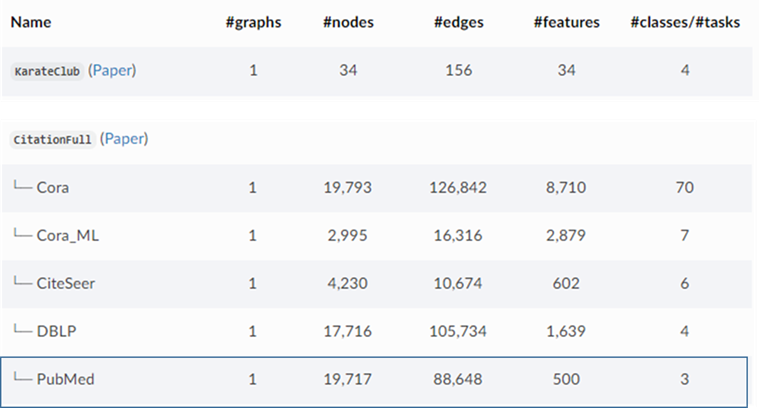

https://pytorch-geometric.readthedocs.io/en/latest/notes/data_cheatsheet.html

In [12]:
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')
print(f'Number of Node Features: {dataset.num_node_features}')
print(f'Number of Edge Features: {dataset.num_edge_features}')


Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4
Number of Node Features: 34
Number of Edge Features: 0


# **Karate Club Dataset Info:**
- This dataset holds exactly one graph, 
- Each node in this dataset is assigned a 34-dimensional feature vector (which uniquely describes the members of the karate club). 
- The graph holds exactly 4 classes, which represent the community each node belongs to.

# **Dataset <-> data**
Each graph in PyTorch Geometric is represented by a single Data object, which holds all the information to describe its graph representation.


https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html
- data.x: Node feature matrix with shape [num_nodes, num_node_features]
- data.edge_index: Graph connectivity in COO format with shape [2, num_edges] and type torch.long
- data.edge_attr: Edge feature matrix with shape [num_edges, num_edge_features]
- data.y: Target to train against (may have arbitrary shape), e.g., node-level targets of shape [num_nodes, *] or graph-level targets of shape [1, *]
- data.pos: Node position matrix with shape [num_nodes, num_dimensions]

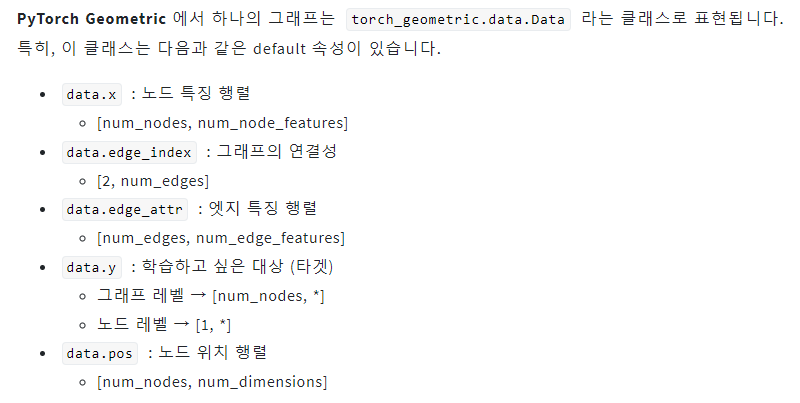

[예제를 통해 알아보는 PyTorch Geometric 5 Basic Concepts](https://baeseongsu.github.io/posts/pytorch-geometric-introduction/)

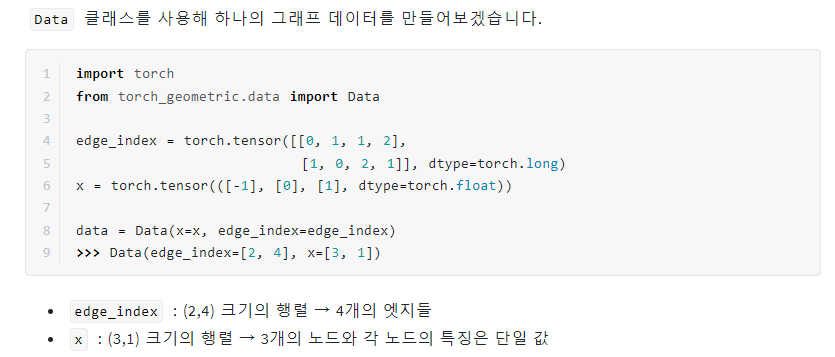

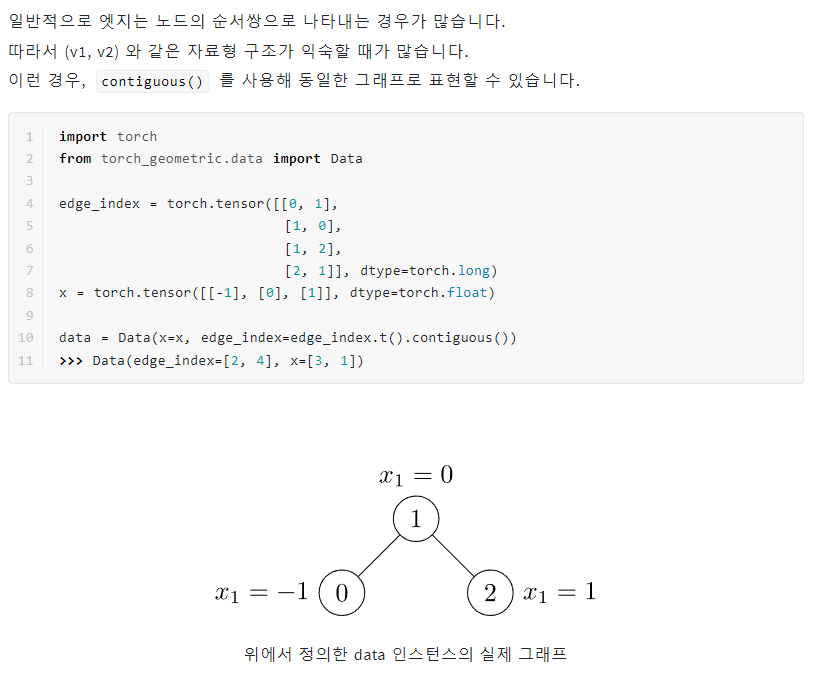

In [13]:
data = dataset[0]  # Get the first graph object.

print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


**Data Handling of Graphs**

A graph is used to model pairwise relations (edges) between objects (nodes). A single graph in PyG is described by an instance of torch_geometric.data.Data, which holds the following attributes by default:

PyG의 단일 그래프는 **torch_geometric.data의 인스턴스**로 설명된다. 데이터 - 기본적으로 다음 속성을 보유한다.

x[34, 34] = x[num_nodes, num_node_features] 노드수 34, 노드 특성수 34

edge_index[2, 156] = [2, num_edges] = Graph connectivity (2차원) 엣지수 156

edge_attr = Edge feature matrix with shape **[num_edges, num_edge_features]**

y[34] = Target to train = y[num_nodes, *] = 학습 타겟 노드 수

data.face에 의해 확장하여 shape **[3, num_faces]** 및 torch.long 유형의 텐서에서 3D mesh로부터 삼각형의 연결을 저장할 수 있다.

PyTorch 및 torchvision은 이미지와 타겟의 튜플로서 예제를 정의한다. PyG에서 이 표기법을 생략한다.

In [14]:
#data = dataset[0]  # Get the first graph object.

#print(data)

Above we can see that this data object holds 4 attributes: 
- (1) The edge_index property holds the information about the graph connectivity, i.e., a tuple of source and destination node indices for each edge. 
- (2) node features as x (each of the 34 nodes is assigned a 34-dim feature vector)
- (3) node labels as y (each node is assigned to exactly one class). 

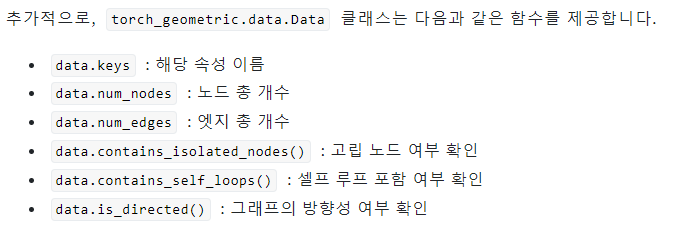

In [15]:
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is Directed: {data.is_directed()}')
print(f'Is undirected: {data.is_undirected()}')

Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Has isolated nodes: False
Has self-loops: False
Is Directed: False
Is undirected: True


고립 노드 없음. 셀프루프 없음. 무방향 그래프

In [19]:
print(f'Edge weight: {data.edge_weight}')
print(f'Graph contains isolated nodes: {data.contains_isolated_nodes()}')

Edge weight: None
Graph contains isolated nodes: False


가중치 없음

In [20]:
print('==============================================================')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')


Number of training nodes: 4
Training node label rate: 0.12


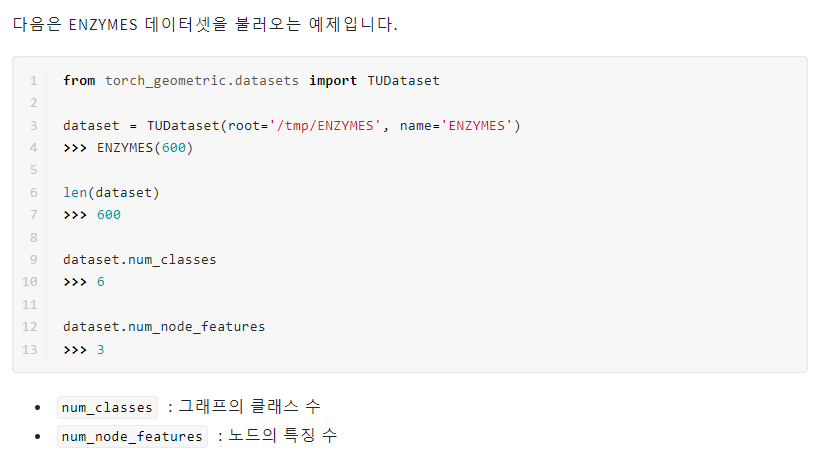

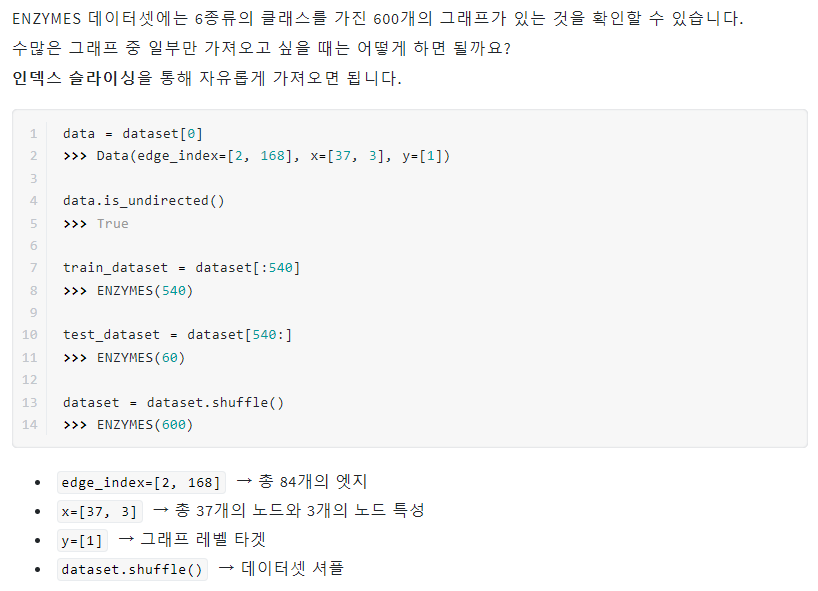

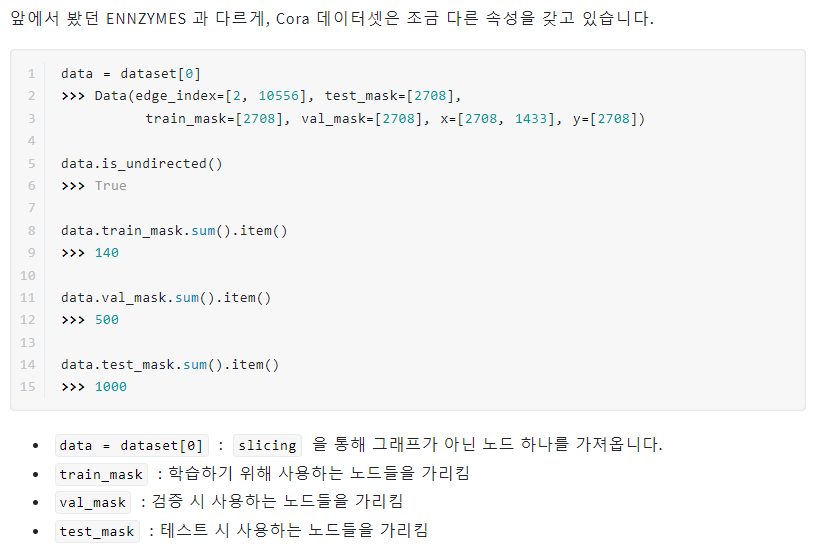

# **Node Store**

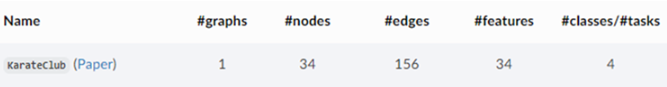

In [23]:
#dataset = KarateClub()

print(data)
data.node_stores

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


[{'x': tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]), 'edge_index': tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
           3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
           7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
          13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
          21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
          27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
          31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
          33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
    

- train_mask : 학습하기 위해 사용하는 노드들을 가리킴
- val_mask : 검증 시 사용하는 노드들을 가리킴
- test_mask : 테스트 시 사용하는 노드들을 가리킴

In [35]:
data.to_dict() # dictionary로 변환

{'x': tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]),
 'edge_index': tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
           3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
           7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
          13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
          21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
          27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
          31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
          33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
    

1) data.y : 학습하고 싶은 대상 (타겟)
- 그래프 레벨 → [num_nodes, *]
- 노드 레벨 → [1, *]

위 y값 = {0,1,2,3,} 4개 클래스

2) train 대상(mask)는 4개 True (34개 노드 중 4개 노드)


In [31]:
# Convert tensorflow dataset to pandas dataframe

#import pandas as pd
#import tensorflow as tf


#def convert_tf_to_pd(ds, limit=32):
   
#    batch_iterator = ds.batch(limit).make_one_shot_iterator()
#    with tf.Session() as sess:
#        batch = batch_iterator.get_next()
#        features_and_labels = sess.run(batch)
#        samples = {
#            **features_and_labels[0],
#            'label': features_and_labels[1],
#        }
#    return pd.DataFrame.from_dict(samples)

#ds = data.to_dict()
#convert_tf_to_pd(ds)

https://stackoverflow.com/questions/51772042/converting-tensorflow-dataset-to-pandas-dataframe

In [36]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

<IPython.core.display.Javascript object>

Karate Club dataset:
- edge_index=[2, 156]

data.edge_index : 그래프의 연결성 (엣지수 : 156)

In [37]:
edge_index = data.edge_index

This representation is known as the COO format (coordinate format) commonly used for representing sparse matrices. 

In [38]:
# Print as tensor
print(edge_index.t()) #노드로 표현된 엣지

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

In [39]:
edge_index

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3,  0,  2, 30, 32, 33,  2, 33,  0,  4

2차원 데이터 ([[.노드 1...], [..노드 2...]]) 노드 1 - 노드2의 156개 엣지

# **Graph Classes**

num_classes : 그래프의 클래스 수
num_node_features : 노드의 특징 수

In [40]:
print(f'Number of classes: {dataset.num_classes}')
print(data)

Number of classes: 4
Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [41]:
data.y

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

- y값 = {0,1,2,3,} 4개 클래스
- data.y : 학습하고 싶은 대상 (타겟) (그래프 레벨 → [num_nodes, *], 노드 레벨 → [1, *])

In [42]:
data.y.shape

torch.Size([34])

## **Node Features**

num_node_features : 노드의 특성 수

In [43]:
print(data.num_node_features)
print(data.num_features)
print(data.num_nodes)

34
34
34


https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html
- data.x: Node feature matrix with shape [num_nodes, num_node_features]

In [44]:
data.x

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

34개 특성을 one-hot vector 로 표현된 x 값 [1, 0, ...0, 0, 0] X 34개 노드

In [45]:
data.x[0] # 첫번째 X[0] 값

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
# data.x[34] will be out of the range ( i =0 ~33로 34개)
data.x[33] # all 0 to 33 features 

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

# **Graph Visualization**

In [47]:
def visualize_graph(G, color):
    plt.figure(figsize=(12,12))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,  #샘플링
                     node_color=color, cmap="Set2")
    plt.show()

[networkx의 layout 정리하기](https://frhyme.github.io/python-lib/networkx_layout/)

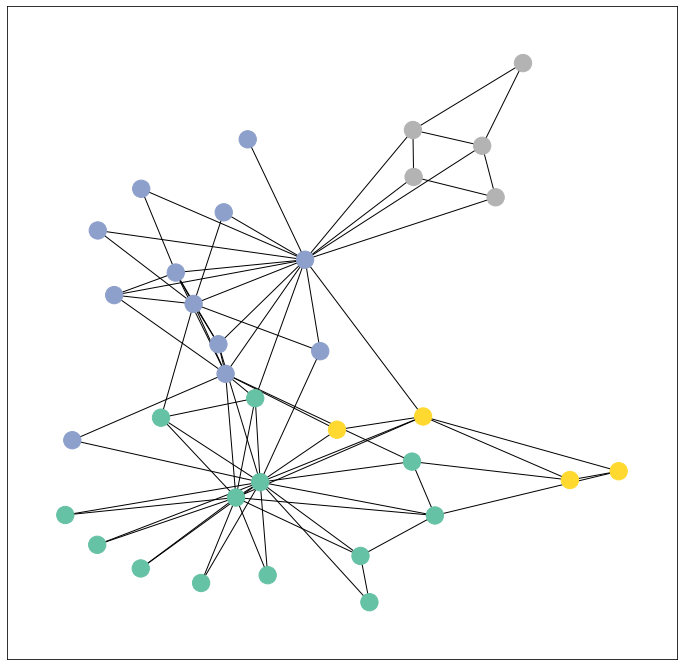

In [48]:
from torch_geometric.utils import to_networkx
karate_undirected_graph = to_networkx(data, to_undirected=True)
visualize_graph(karate_undirected_graph, color=data.y) # 타겟값 레이블에 따라 색깔을 달리 구분(범주)

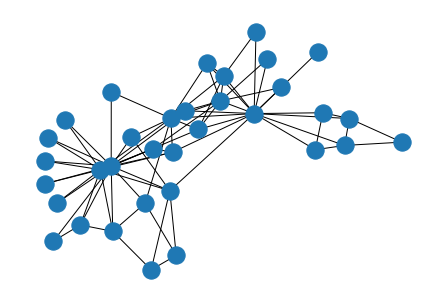

In [49]:
nx.draw(to_networkx(data, to_undirected=True))

In [50]:
karate_undirected_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

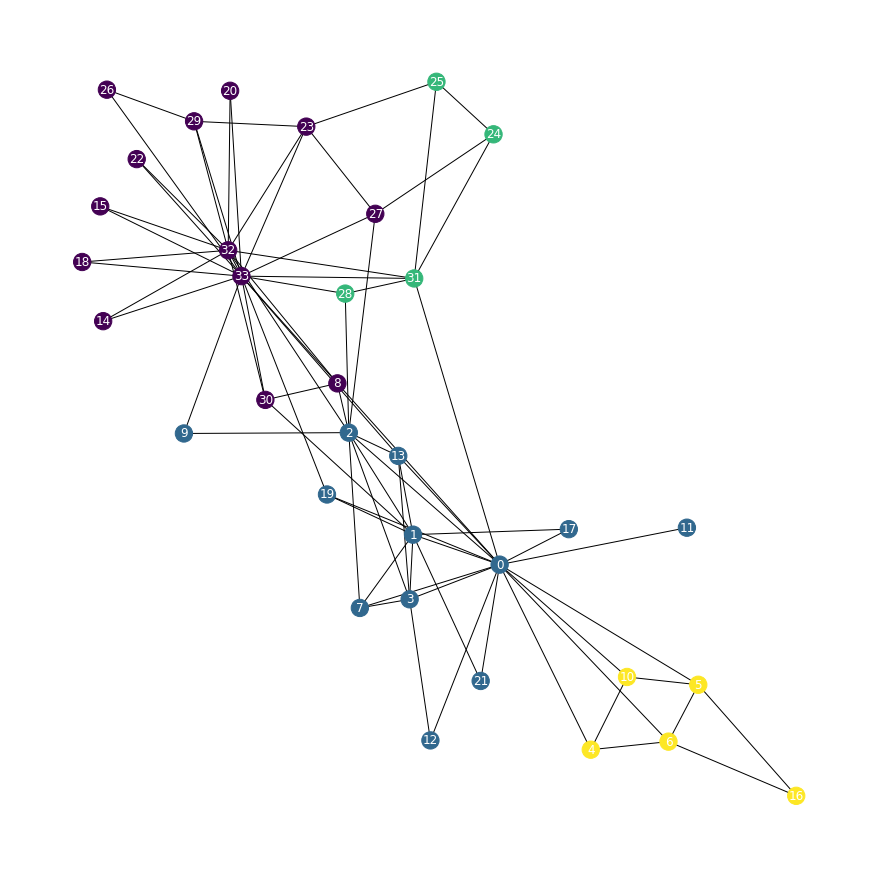

In [51]:
plt.figure(figsize=(12,12))
nx.draw(karate_undirected_graph, cmap=plt.get_cmap('viridis'), with_labels=True, node_color=data.y, font_color='white')
# 4 Classes are visible

In [52]:
print(karate_undirected_graph.number_of_edges()) # 엣지수
karate_undirected_graph.edges #엣지 (노드쌍으로) 표현

78


EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [53]:
print(karate_undirected_graph.number_of_nodes()) # 노드수 
karate_undirected_graph.degree                   # 노드별 엣지수 (차수)
# Please check the undirected graph and make sure if you can match the degrees for node "0"

34


DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [54]:
karate_directed_graph = to_networkx(data) # 방향성 그래프로 저장

In [55]:
karate_directed_graph.node  #'DiGraph' object has no attribute 'node'

AttributeError: ignored

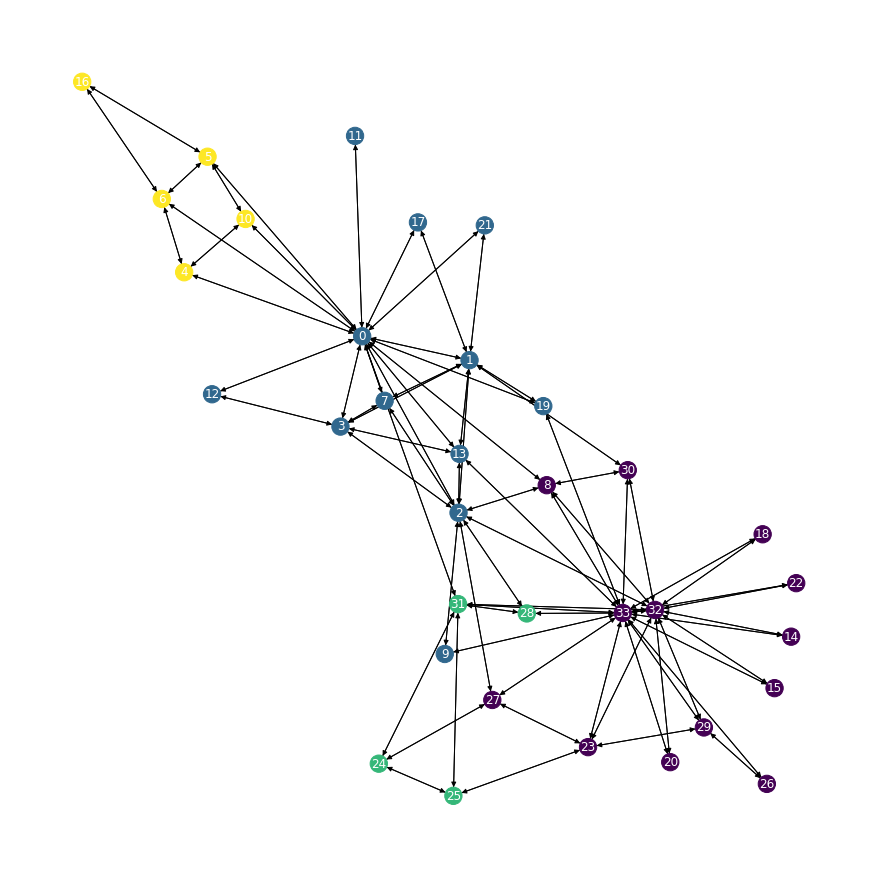

In [57]:
plt.figure(figsize=(12,12))
nx.draw(karate_directed_graph, cmap=plt.get_cmap('viridis'), with_labels=True, node_color=data.y, font_color='white')

# 4 Classes are visible
#nx.draw(karate_directed_graph, cmap=plt.get_cmap('viridis'), node_color=karate_directed_graph)

## **Edges**

In [ ]:
print(karate_directed_graph.number_of_edges())
karate_directed_graph.edges # 엣지를 노드쌍으로 표현

156


OutEdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 0), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 0), (2, 1), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 0), (3, 1), (3, 2), (3, 7), (3, 12), (3, 13), (4, 0), (4, 6), (4, 10), (5, 0), (5, 6), (5, 10), (5, 16), (6, 0), (6, 4), (6, 5), (6, 16), (7, 0), (7, 1), (7, 2), (7, 3), (8, 0), (8, 2), (8, 30), (8, 32), (8, 33), (9, 2), (9, 33), (10, 0), (10, 4), (10, 5), (11, 0), (12, 0), (12, 3), (13, 0), (13, 1), (13, 2), (13, 3), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (16, 5), (16, 6), (17, 0), (17, 1), (18, 32), (18, 33), (19, 0), (19, 1), (19, 33), (20, 32), (20, 33), (21, 0), (21, 1), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 23), (25, 24), (25, 31), (26, 29), (26, 33), (27, 2), (27, 23), (27, 24), (27, 33), (28, 

# **Node Degrees**

In [58]:
print(karate_directed_graph.number_of_nodes())
karate_directed_graph.degree #노드별 연결 엣지수 (차수)
# Please check the directed graph and make sure if you can match the degrees for node "0"

34


DiDegreeView({0: 32, 1: 18, 2: 20, 3: 12, 4: 6, 5: 8, 6: 8, 7: 8, 8: 10, 9: 4, 10: 6, 11: 2, 12: 4, 13: 10, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 19: 6, 20: 4, 21: 4, 22: 4, 23: 10, 24: 6, 25: 6, 26: 4, 27: 8, 28: 6, 29: 8, 30: 8, 31: 12, 32: 24, 33: 34})

In [59]:
nx.to_numpy_matrix(karate_directed_graph)

matrix([[0., 1., 1., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 1.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]])

In [60]:
nx.to_numpy_matrix(karate_undirected_graph)

matrix([[0., 1., 1., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 1.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]])

# **Directed and Undirected Graph handling in PyG**

PyG does not distinguish between directed and undirected graphs, and treats undirected graphs as a special case of directed graphs in which reverse edges exist for every entry in edge_index